In [2]:
from google.colab import files, drive
drive.mount('/content/drive')
uploaded = files.upload()

for fn in uploaded.keys():
  print('Файл(ы) "{name}" размером {length} байт загружен(ы)'.format(name=fn, length=len(uploaded[fn])))

Mounted at /content/drive


Saving rand_f.png to rand_f.png
Saving Бублик одноцветный.jpg to Бублик одноцветный.jpg
Saving Бублик.jpg to Бублик.jpg
Saving Бублик+прямоугольник.jpg to Бублик+прямоугольник.jpg
Saving Прямоугольники.png to Прямоугольники.png
Saving Рояль.jpg to Рояль.jpg
Saving Стол.jpg to Стол.jpg
Saving Эллипсы.png to Эллипсы.png
Файл(ы) "rand_f.png" размером 6610 байт загружен(ы)
Файл(ы) "Бублик одноцветный.jpg" размером 14916 байт загружен(ы)
Файл(ы) "Бублик.jpg" размером 6200 байт загружен(ы)
Файл(ы) "Бублик+прямоугольник.jpg" размером 22091 байт загружен(ы)
Файл(ы) "Прямоугольники.png" размером 50584 байт загружен(ы)
Файл(ы) "Рояль.jpg" размером 110121 байт загружен(ы)
Файл(ы) "Стол.jpg" размером 137423 байт загружен(ы)
Файл(ы) "Эллипсы.png" размером 171963 байт загружен(ы)


In [4]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np 
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
def resized(img):
  img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  final_wide = 400
  res_img = float(final_wide) / img1.shape[0]
  dim = (int(img1.shape[1] * res_img), final_wide)

  if img.shape[1] > final_wide:
    cvi = cv2.INTER_AREA
  else:
    cvi = cv2.INTER_LINEAR

  resized = cv2.resize(img1, dim, interpolation = cvi)
  resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

  return resized

# Задание 1

1. Выделите контуры на рисунках, приложенных к заданию, используя cv2.findContours(). Меняя в функции cv2.drawContours() параметры contoursIdx, color, thickness (3, 4 и 5-й аргументы по счету соответственно), выведите на экран по отдельности внешний и внутренний контуры, измените цвет контура и толщину линий контура.

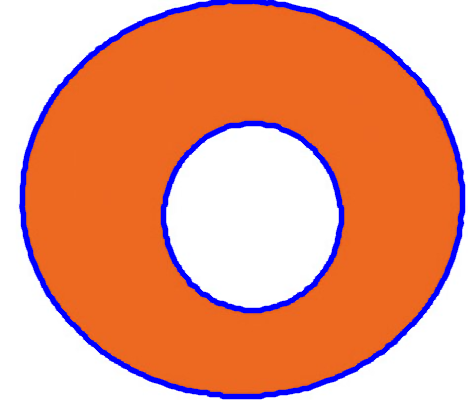

In [6]:
don_m_img = cv2.imread('Бублик одноцветный.jpg')
don_m_img = resized(don_m_img)

don_m_img1 = don_m_img.copy()

don_m_hsv = cv2.cvtColor(don_m_img1, cv2.COLOR_BGR2HSV)

hsv_min = np.array((2, 28, 65), np.uint8) # подбираем параметры цветового фильтра для выделения нашего объекта (указанные числовые значения могут отличаться)
hsv_max = np.array((24, 238, 255), np.uint8)

hsv_msk = cv2.inRange(don_m_hsv, hsv_min, hsv_max) # применяем цветовой фильтр к исходному изображению, результат записываем в переменную hsv_msk

# ищем контуры и записываем их в переменную contours в режиме поиска всех контуров без группировки cv2.RETR_LIST для хранения контуров используем
# метод cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(hsv_msk, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


cv2.drawContours(don_m_img1, contours, 0, (255,0,0), 3, cv2.LINE_AA, hierarchy, 2) # отображаем все контуры поверх исходного изображения, цвет синий, толщина линии 3, сглаженная
cv2.drawContours(don_m_img1, contours, 1, (255,0,0), 3, cv2.LINE_AA, hierarchy, 2)

cv2_imshow(don_m_img1)

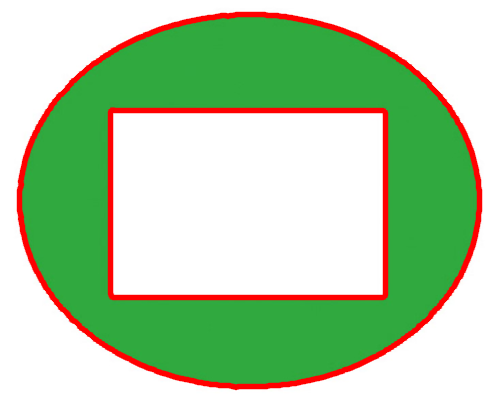

In [7]:
don_rec_img = cv2.imread('Бублик+прямоугольник.jpg')
don_rec_img = resized(don_rec_img)

don_rec_img1 = don_rec_img.copy()

don_rec_hsv = cv2.cvtColor(don_rec_img1, cv2.COLOR_BGR2HSV)

hsv_min = np.array((50, 28, 65), np.uint8) # подбираем параметры цветового фильтра для выделения нашего объекта (указанные числовые значения могут отличаться)
hsv_max = np.array((100, 238, 255), np.uint8)

hsv_msk = cv2.inRange(don_rec_hsv, hsv_min, hsv_max) # применяем цветовой фильтр к исходному изображению, результат записываем в переменную hsv_msk

# ищем контуры и записываем их в переменную contours в режиме поиска всех контуров без группировки cv2.RETR_LIST для хранения контуров используем
# метод cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(hsv_msk, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


cv2.drawContours(don_rec_img1, contours, -1, (0,0,255), 3, cv2.LINE_AA, hierarchy, 2) # отображаем все контуры поверх исходного изображения, цвет синий, толщина линии 3, сглаженная

cv2_imshow(don_rec_img1)

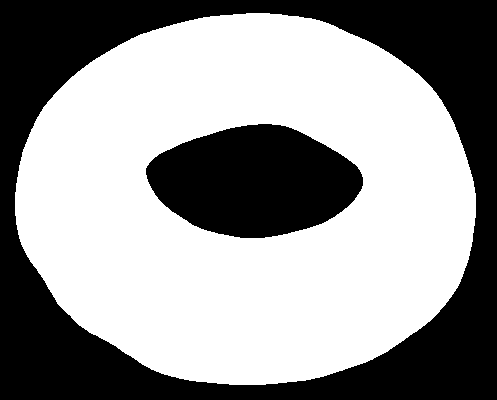

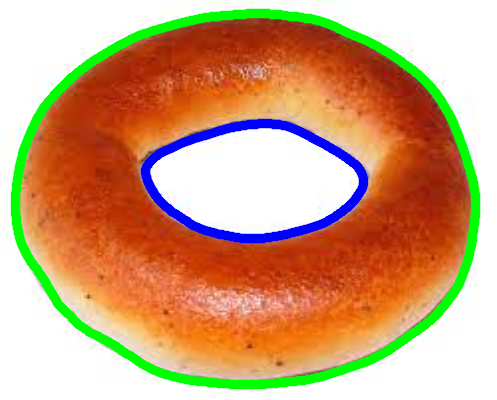

In [8]:
don_img = cv2.imread('Бублик.jpg')
don_img = resized(don_img)

don_img1 = don_img.copy()

don_rec_hsv = cv2.cvtColor(don_img1, cv2.COLOR_BGR2HSV)

hsv_min = np.array((0, 15, 5), np.uint8) # подбираем параметры цветового фильтра для выделения нашего объекта (указанные числовые значения могут отличаться)
hsv_max = np.array((200, 255, 254), np.uint8)

hsv_msk = cv2.inRange(don_rec_hsv, hsv_min, hsv_max) # применяем цветовой фильтр к исходному изображению, результат записываем в переменную hsv_msk

hsv_msk = cv2.medianBlur(hsv_msk, 27)

# ищем контуры и записываем их в переменную contours в режиме поиска всех контуров без группировки cv2.RETR_LIST для хранения контуров используем
# метод cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(hsv_msk, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


cv2.drawContours(don_img1, contours, 0, (255,0,0), 7, cv2.LINE_AA, hierarchy, 2) # отображаем все контуры поверх исходного изображения, цвет синий, толщина линии 3, сглаженная
cv2.drawContours(don_img1, contours, 1, (0,255,0), 7, cv2.LINE_AA, hierarchy, 2)

cv2_imshow(hsv_msk)
cv2_imshow(don_img1)

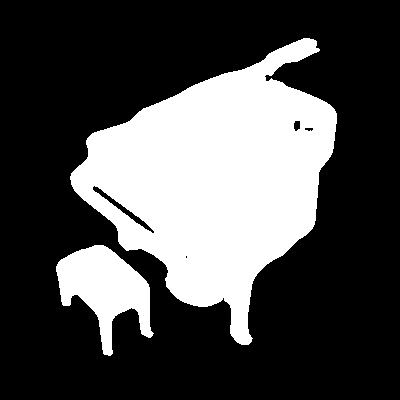

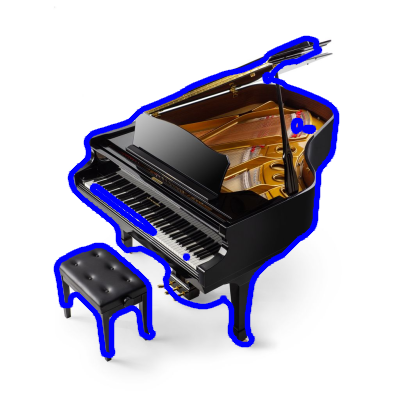

In [9]:
piano_img = cv2.imread('Рояль.jpg')
piano_img = resized(piano_img)

piano_img1 = piano_img.copy()

piano_hsv = cv2.cvtColor(piano_img1, cv2.COLOR_BGR2HSV)

hsv_min = np.array((0, 0, 0), np.uint8) # подбираем параметры цветового фильтра для выделения нашего объекта (указанные числовые значения могут отличаться)
hsv_max = np.array((250, 255, 200), np.uint8)

hsv_msk = cv2.inRange(piano_hsv, hsv_min, hsv_max) # применяем цветовой фильтр к исходному изображению, результат записываем в переменную hsv_msk

hsv_msk = cv2.medianBlur(hsv_msk, 15)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
hsv_msk = cv2.dilate(hsv_msk, kernel, iterations = 1)

# ищем контуры и записываем их в переменную contours в режиме поиска всех контуров без группировки cv2.RETR_LIST для хранения контуров используем
# метод cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(hsv_msk, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

'''
for i in range(0, len):
  piano_img1 = piano_img.copy()
  print('Номер контура - ', i)
  cv2.drawContours(piano_img1, contours, i, (255,0,0), 5, cv2.LINE_AA, hierarchy, 2) # отображаем все контуры поверх исходного изображения, цвет синий, толщина линии 3, сглаженная
  cv2_imshow(piano_img1)
'''

cv2.drawContours(piano_img1, contours, -1, (255,0,0), 3, cv2.LINE_AA, hierarchy, 2) # отображаем все контуры поверх исходного изображения, цвет синий, толщина линии 3, сглаженная
#cv2.drawContours(piano_img1, contours, 183, (255,0,0), 3, cv2.LINE_AA, hierarchy, 2)
 
cv2_imshow(hsv_msk)
cv2_imshow(piano_img1)

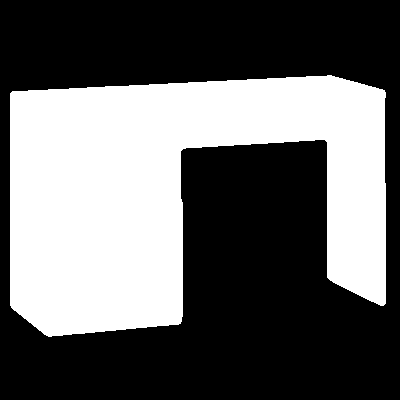

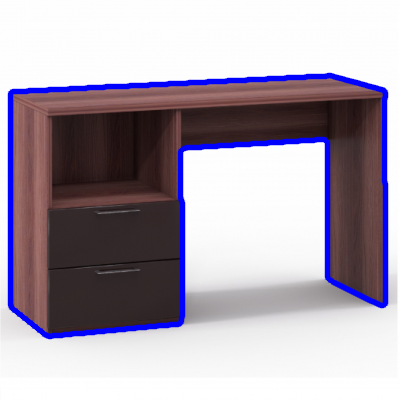

In [10]:
table_img = cv2.imread('Стол.jpg')
table_img = resized(table_img)

table_img1 = table_img.copy()

table_hsv = cv2.cvtColor(table_img1, cv2.COLOR_BGR2HSV)

hsv_min = np.array((0, 15, 10), np.uint8) # подбираем параметры цветового фильтра для выделения нашего объекта (указанные числовые значения могут отличаться)
hsv_max = np.array((250, 255, 200), np.uint8)

hsv_msk = cv2.inRange(table_hsv, hsv_min, hsv_max) # применяем цветовой фильтр к исходному изображению, результат записываем в переменную hsv_msk

hsv_msk = cv2.medianBlur(hsv_msk, 5)

# ищем контуры и записываем их в переменную contours в режиме поиска всех контуров без группировки cv2.RETR_LIST для хранения контуров используем
# метод cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(hsv_msk, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


cv2.drawContours(table_img1, contours, -1, (255,0,0), 3, cv2.LINE_AA, hierarchy, 2) # отображаем все контуры поверх исходного изображения, цвет синий, толщина линии 3, сглаженная

cv2_imshow(hsv_msk)
cv2_imshow(table_img1)

2. Подготовьте с помощью графического редактора изображение с несколькими объектами произвольной формы, окрашивая их в один цвет. Подобрав параметры цветового фильтра, выведите на экран контуры, а затем прямоугольные и эллиптические контуры всех объектов.

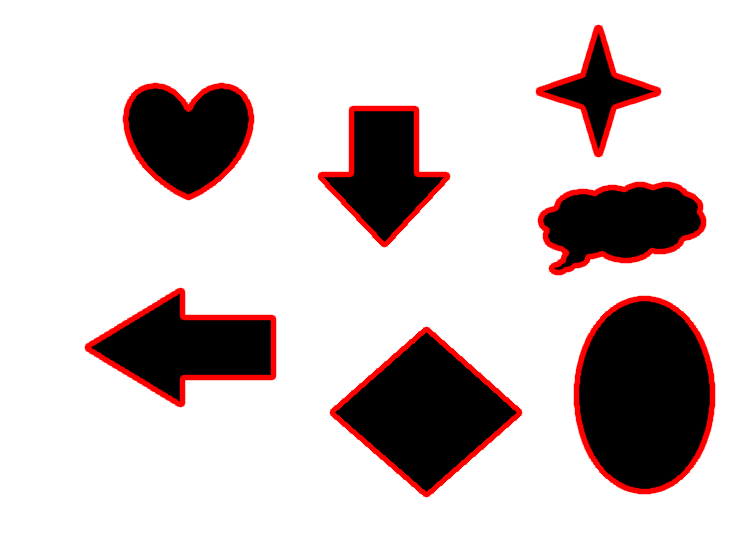

In [11]:
rand_f = cv2.imread('rand_f.png')
rand_f1 = rand_f.copy()

rand_f_hsv = cv2.cvtColor(rand_f1, cv2.COLOR_BGR2HSV)

hsv_min = np.array((0, 0, 0), np.uint8) # подбираем параметры цветового фильтра для выделения нашего объекта (указанные числовые значения могут отличаться)
hsv_max = np.array((10, 10, 10), np.uint8)

hsv_msk = cv2.inRange(rand_f_hsv, hsv_min, hsv_max) # применяем цветовой фильтр к исходному изображению, результат записываем в переменную hsv_msk

# ищем контуры и записываем их в переменную contours в режиме поиска всех контуров без группировки cv2.RETR_LIST для хранения контуров используем
# метод cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(hsv_msk, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(rand_f1, contours, -1, (0,0,255), 3, cv2.LINE_AA, hierarchy, 2)

cv2_imshow(rand_f1)

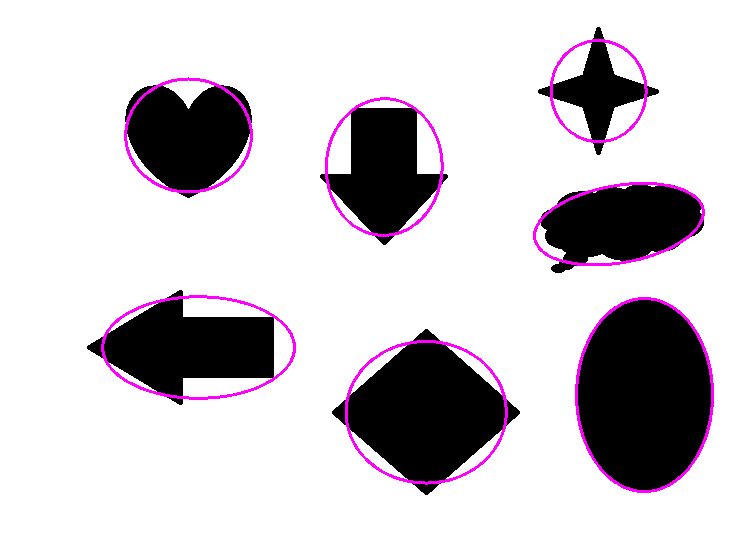

In [12]:
rand_f2 = rand_f.copy()

rand_f_hsv = cv2.cvtColor(rand_f2, cv2.COLOR_BGR2HSV)

hsv_min = np.array((0, 0, 0), np.uint8) # подбираем параметры цветового фильтра для выделения нашего объекта (указанные числовые значения могут отличаться)
hsv_max = np.array((10, 10, 10), np.uint8)

hsv_msk = cv2.inRange(rand_f_hsv, hsv_min, hsv_max) # применяем цветовой фильтр к исходному изображению, результат записываем в переменную hsv_msk

# ищем контуры и записываем их в переменную contours в режиме поиска всех контуров без группировки cv2.RETR_LIST для хранения контуров используем
# метод cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(hsv_msk, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for icontour in contours: # перебираем все найденные контуры в цикле 
  ellipse = cv2.fitEllipse(icontour)# записываем в переменную ellipse, отвечающий условию контур в форме эллипса
  cv2.ellipse(rand_f2, ellipse, (255,0,255), 2)# отображаем найденный эллипс

cv2_imshow(rand_f2)

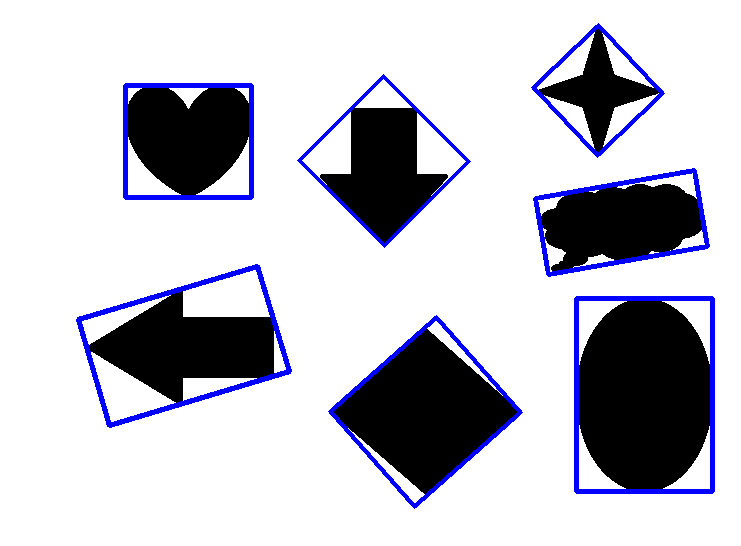

In [13]:
rand_f3 = rand_f.copy()

rand_f_hsv = cv2.cvtColor(rand_f3, cv2.COLOR_BGR2HSV)

hsv_min = np.array((0, 0, 0), np.uint8) # подбираем параметры цветового фильтра для выделения нашего объекта (указанные числовые значения могут отличаться)
hsv_max = np.array((10, 10, 10), np.uint8)

hsv_msk = cv2.inRange(rand_f_hsv, hsv_min, hsv_max) # применяем цветовой фильтр к исходному изображению, результат записываем в переменную hsv_msk

# ищем контуры и записываем их в переменную contours в режиме поиска всех контуров без группировки cv2.RETR_LIST для хранения контуров используем
# метод cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(hsv_msk, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for icontour in contours:
  rect = cv2.minAreaRect(icontour) # ищем прямоугольник, результат записываем в rect
  box = cv2.boxPoints(rect) # поиск вершин прямоугольника, результат записываем в box
  box = np.int0(box) # округление координат вершин, результат записываем в box
  
  # рисуем прямоугольник поверх исходного изображения цвет синий, толщина линии 3, поскольку рисуем
  # единственный объект [box], остальные параметры опускаем
  cv2.drawContours(rand_f3, [box], -1, (255, 0, 0), 3)

cv2_imshow(rand_f3)

3. Изменяя наложение суммы масок, выделите из рисунка прямоугольные контуры объектов различных цветов, например, красных и желтых объектов с отсевом мелких контуров и т. д.

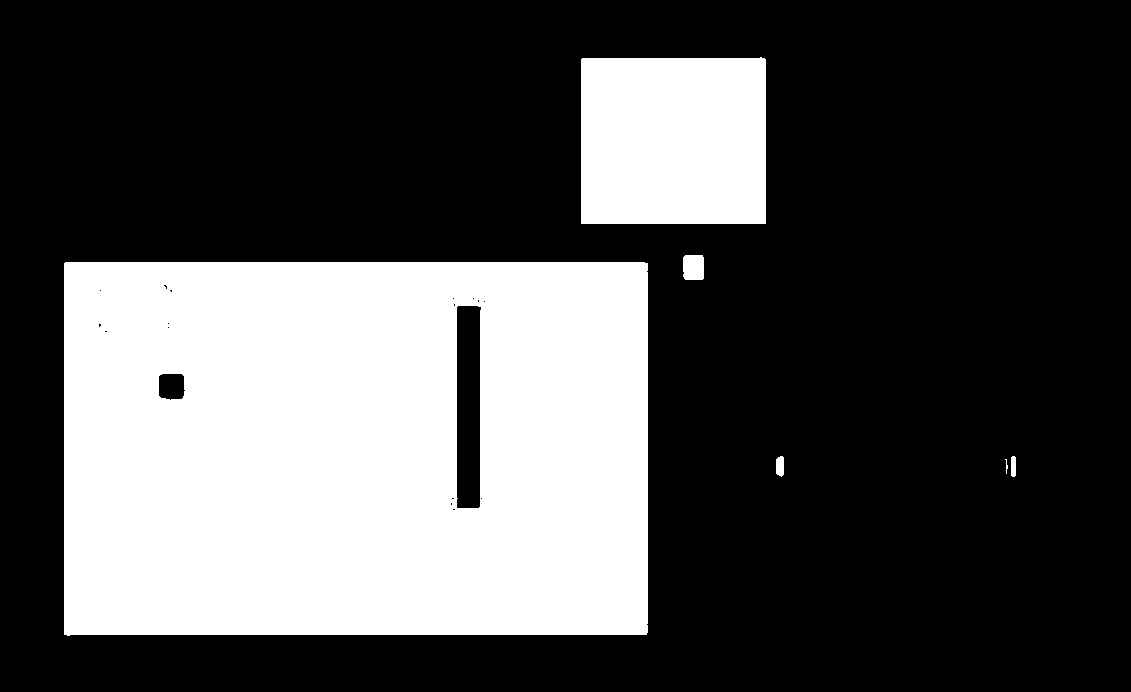

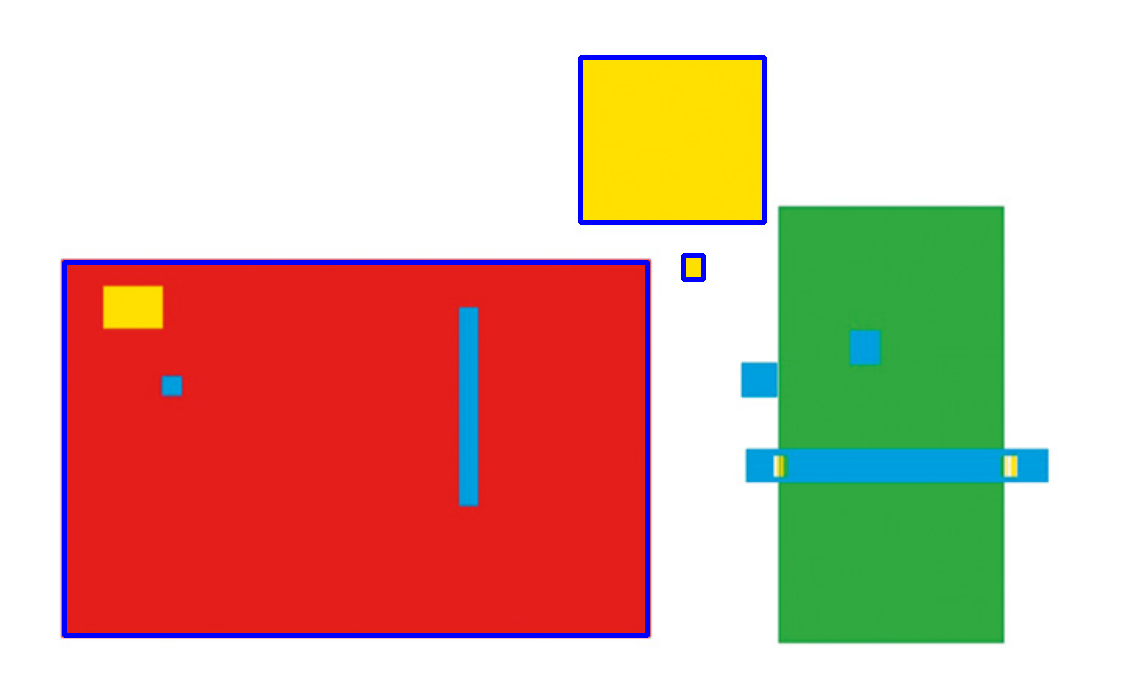

In [14]:
rect_img = cv2.imread('Прямоугольники.png')
rect_img1 = rect_img.copy()

hsv_img = cv2.cvtColor(rect_img1, cv2.COLOR_BGR2HSV)# конвертируем исходное изображение в цветовую модель HSV, результат записываем в переменную hsv_img

hsv_min = np.array((0,100,100), np.uint8)
hsv_max = np.array((50,255,255), np.uint8)

#red_msk = cv2.inRange(hsv_img, red_min, red_max) # применяем цветовой фильтр к исходному изображению, результат записываем в переменную hsv_msk
hsv_msk = cv2.inRange(hsv_img, hsv_min, hsv_max)

# ищем контуры и записываем их в переменную contours в режиме поиска всех контуров без группировки cv2.RETR_LIST для хранения контуров используем
# метод cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(hsv_msk, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for icontour in contours: # перебираем все найденные контуры в цикле 
  rect = cv2.minAreaRect(icontour) # ищем прямоугольник, результат записываем в rect
  area = int(rect[1][0]*rect[1][1]) # вычисление площади

  if area > 150: # если площадь больше указанного значения, эти контуры выводим, значение подбираем экспериментально
      box = cv2.boxPoints(rect) # поиск вершин прямоугольника, результат записываем в box
      box = np.int0(box) # округление координат вершин, результат записываем в box
      
      # рисуем прямоугольник поверх исходного изображения цвет синий, толщина линии 3, поскольку рисуем
      # единственный объект [box], остальные параметры опускаем
      cv2.drawContours(rect_img1, [box], -1, (255, 0, 0), 3)

cv2_imshow(hsv_msk)
cv2_imshow(rect_img1)

4. Выполните поиск и отображение эллиптического контура объекта, подбирая значение в функции len():

    a. самого малого размера; 

    b. самого большого размера.

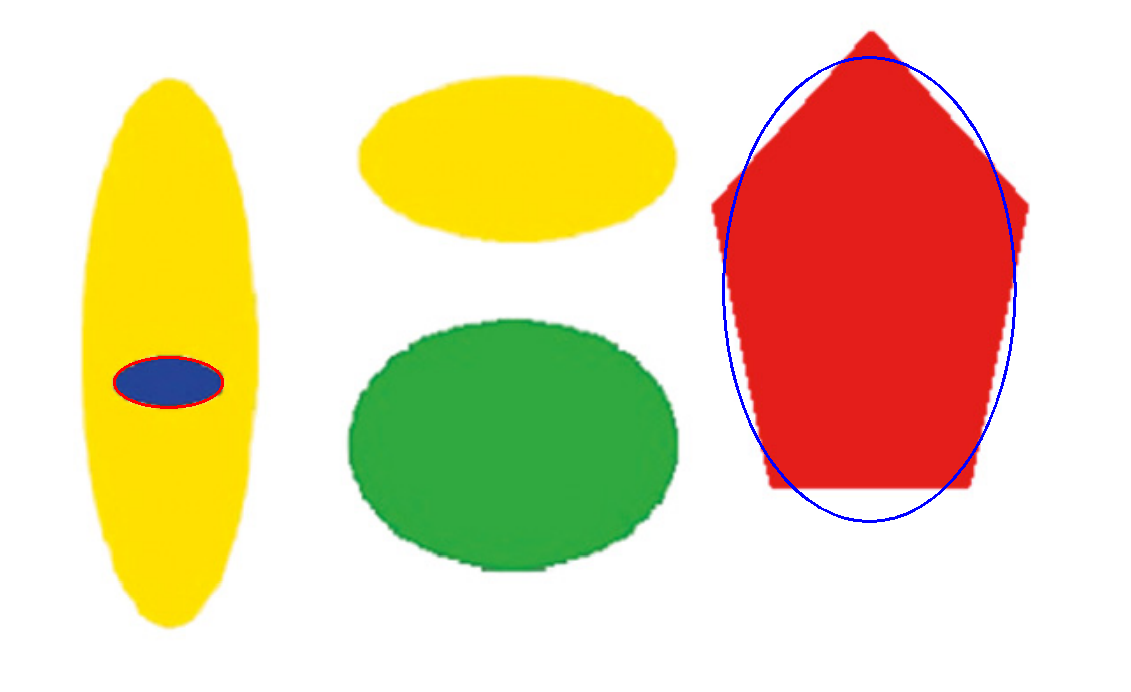

In [15]:
ell_img = cv2.imread('Эллипсы.png')
ell_img1 = ell_img.copy()

hsv_img = cv2.cvtColor(ell_img1, cv2.COLOR_BGR2HSV)# конвертируем исходное изображение в цветовую модель HSV, результат записываем в переменную hsv_img

hsv_min = np.array((0, 50, 50), np.uint8)# подбираем параметры цветового фильтра для выделения нашего объекта (указанные числовые значения могут отличаться)
hsv_max = np.array((100, 255, 255), np.uint8)

hsv_msk = cv2.inRange(hsv_img, hsv_min, hsv_max) # применяем цветовой фильтр к исходному изображению, результат записываем в переменную hsv_msk
hsv_msk = cv2.medianBlur(hsv_msk, 5)

# ищем контуры и записываем их в переменную contours в режиме поиска всех контуров без группировки cv2.RETR_LIST для хранения контуров используем
# метод cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(hsv_msk, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

min_contour = []
max_contour = []
min_len = 1000
max_len = 0

for icontour in contours: # перебираем все найденные контуры в цикле 
  if len(icontour) < min_len:
    min_len = len(icontour)
    min_contour = icontour
  if len(icontour) > max_len:
    max_len = len(icontour)
    max_contour = icontour
  # ellipse = cv2.fitEllipse(icontour) # записываем в переменную ellipse, отвечающий условию контур в форме эллипса
  # cv2.ellipse(ell_img1, ellipse, (255,0,255), 2) # отображаем найденный эллипс

ellipse_min = cv2.fitEllipse(min_contour)
cv2.ellipse(ell_img1, ellipse_min, (0,0,255), 2)

ellipse_max = cv2.fitEllipse(max_contour)
cv2.ellipse(ell_img1, ellipse_max, (255,0,0), 2)

#cv2_imshow(hsv_msk)
cv2_imshow(ell_img1)

# Задание 2

In [20]:
video = "/content/drive/MyDrive/Colab Notebooks/Данные/Инструктор.mp4"

In [18]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open(video,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [19]:
HTML("""
<video width=1000 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [28]:
capImg = cv2.VideoCapture(video) # связываем видеопоток файла с переменной capImg

count = 0
while(capImg.isOpened()): # открываем файл с видео
  count += 1
  ret, frame = capImg.read() # получаем кадр из видеопотока файла, кадры по очереди считываются в переменную frame
  if frame is None or count > 200:  # если кадры закончились, то прерываем цикл
    break
  frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # переводим кадр в цветовое HSV-пространство
  crop_frame = frame[200:470, 550:850]  # делаем вырезку области кадра, где ожидается объект
  crop_frame_hsv = frame_hsv[200:470, 550:850]
  
  # задаем нижнюю и верхнюю границы цветового фильтра с помощью массивов numpy

  # цвет 0...180,
  # насыщенность 0 – блеклый, 255 - насыщенный
  # яркость 0 – темный, 255 - светлый

  low_Blue = np.array ([110, 50, 90],  dtype = "uint8") # фильтр для синего цвета 
  high_Blue = np.array([135, 255, 210], dtype = "uint8")
 
  low_Yel = np.array([2, 110, 110], dtype = "uint8") # фильтр для желтого цвета
  high_Yel = np.array([30, 255, 255], dtype = "uint8")
  '''
  low_Red_O = np.array([0, 100, 100], dtype = "uint8") # фильтр для красного цвета
  high_Red_O = np.array([15, 255, 250], dtype = "uint8") # красный цвет представляет собой две области, красный в сторону оранжевой области 
  low_Red_V = np.array([150, 50, 100], dtype = "uint8") # красный в сторону фиолетовой области
  high_Red_V = np.array([200, 200, 200], dtype = "uint8")
  '''

  blue_mask = cv2.inRange(crop_frame_hsv, low_Blue, high_Blue) # применяем маску по каждому цвету к фрагменту кадра для выделения синего цвета

  yel_mask = cv2.inRange(crop_frame_hsv, low_Yel, high_Yel) # для выделения желтого цвета
 
  #red1_mask = cv2.inRange(crop_frame_hsv, low_Red_O, high_Red_O) # для выделения красного накладываются две маски
  #red2_mask = cv2.inRange(crop_frame_hsv, low_Red_V, high_Red_V)
  
  #full_mask = red1_mask + red2_mask + blue_mask + yel_mask # вычисляем полную маску - она представляет собой сумму всех масок 
  full_mask = blue_mask + yel_mask

  contours, hierarchy = cv2.findContours(full_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

  for icontour in contours: # перебираем все найденные контуры в цикле 
    rect = cv2.minAreaRect(icontour) # ищем прямоугольник, результат записываем в rect
    area = int(rect[1][0]*rect[1][1]) # вычисление площади

    if area > 100: # если площадь больше указанного значения, эти контуры выводим, значение подбираем экспериментально
      box = cv2.boxPoints(rect) # поиск вершин прямоугольника, результат записываем в box
      box = np.int0(box) # округление координат вершин, результат записываем в box
      
      # рисуем прямоугольник поверх исходного изображения цвет синий, толщина линии 3, поскольку рисуем
      # единственный объект [box], остальные параметры опускаем
      cv2.drawContours(crop_frame, [box], -1, (255, 0, 0), 3)
    

  #cv2_imshow(full_mask) # результат наложения маски
  cv2_imshow(crop_frame) # вырезка из кадра

Output hidden; open in https://colab.research.google.com to view.